# 経済センサスー活動調査データ

## 概要

経済センサス‐活動調査は、全産業分野の経済活動を同一時点で把握するため、日本国内に所在する全ての事業所・企業を対象として、５年ごとに実施されます。

産業構成、または地域の人々が働く産業の範囲を理解することは、地域の経済発展に関与する政策決定者にとって重要です。

産業構成と地域の経済発展の間の関係について、そして特に、異なる経済結果が多様なまたは専門化された産業構造と関連しているかどうかについて、さまざまな理論が存在します。

この分析では、業界全体の雇用の分布を要約することにより、地域の産業構成を理解するために使用できる全国平均指数を調べます。また、全国平均に似ている地域と異なる地域を特定することもできます。

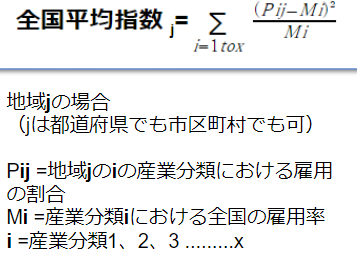



## Step 01

パッケジのインポート

関連するモジュールとパッケージをインポートしましょう。

In [5]:
#この練習問題に使うパケッジ
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

## 解説
ライブラリは、ユーザーが手動でコーディングする必要なく特定の機能を実行する、事前にパッケージ化された機能のコレクションです。それを平均、vlookupなどのExcelの関数と考えてください。

この分析に使用したライブラリには次のものがあります。

- Pandas:データ分析のための最も重要な単一のPythonライブラリ。データセットからのデータの変換と抽出に大きく役立ちます。
- Numpy:一般的な数学的計算を実行できるようにするパッケージ
- Matplotlib –グラフをプロットするための必須の可視化ライブラリ

別名をつけてインポートする場合は、import モジュール名 as つけたい名前を使います pandasにpdという名前をつけることで、以降のプログラムではpdと省略することができます


## Step 02
Pandasは、Pythonを使用するデータサイエンスプロジェクトで使用される非常に重要なライブラリです。

経済センサスに関するデータを読み込んでみましょう。

In [7]:
#データを読み込みましょう
EconomicSurvey=pd.read_csv('C://Users//Menaka Arudchelvan//Desktop//YCU TDB//New Exercises//経済センサス＿活動データ.csv', engine='python',index_col=None, header=0,dtype=str)
print(EconomicSurvey.shape)
print(EconomicSurvey.head())
EconomicSurvey.dtypes


(55248, 12)
  tab_code  表章項目 cat01_code        H28_産業分類 cat02_code H28_経営組織 area_code  \
0        3  企業等数         10  A～R全産業（Ｓ公務を除く）          0       総数      1000   
1        3  企業等数         10  A～R全産業（Ｓ公務を除く）          0       総数      2000   
2        3  企業等数         10  A～R全産業（Ｓ公務を除く）          0       総数      3000   
3        3  企業等数         10  A～R全産業（Ｓ公務を除く）          0       総数      4000   
4        3  企業等数         10  A～R全産業（Ｓ公務を除く）          0       総数      5000   

  H28_地域   time_code    時間軸 unit   value  
0    北海道  2016000000  2016年  nan  147198  
1    青森県  2016000000  2016年  nan   40961  
2    岩手県  2016000000  2016年  nan   39389  
3    宮城県  2016000000  2016年  nan   60408  
4    秋田県  2016000000  2016年  nan   34757  


tab_code      object
表章項目          object
cat01_code    object
H28_産業分類      object
cat02_code    object
H28_経営組織      object
area_code     object
H28_地域        object
time_code     object
時間軸           object
unit          object
value         object
dtype: object

## 解説　02
- Pandasのread_csvヘッダーを使用して、データのどの行をヘッダーと見なすかを指定します。たとえば、ヘッダーは、以下に示すデータセットの最初の行にすでに存在しています（太字の行に注意してください）
    - この場合、header = 0を使用するか、ヘッダー引数を使用しないかのいずれかである必要があります。
    - header = 1は、データセットの2行目をヘッダーと見なすことを意味します。
    - csvファイルにヘッダーがない場合は、読み取り中にheader = Noneに設定する必要があります。次に、パンダは自動生成された整数値をheader.namesとして使用します
    - 列名をデータフレームに明示的に指定する場合は、names属性を使用します。すべての列名はリスト内で言及する必要があります。 df=pd.read_csv("Path", names={”カラム名1”、”カラム名２”、”カラム名３”、”カラム名4”））

- df.head（）は、データセットの最初の数行を示し、上記の出力が表示されます。これは通常、データセットが適切に読み込まれることを確認するために行います。

- shapeは、配列の次元数を示すタプルです。したがって、Y.shape [0]のインデックス値は0なので、配列の最初の次元に沿って作業しています。

- データ型dtypeを確認するには、df.dtypeを使用します。


## Step 03

分析の主要な変数には、集計年、地域名、業界情報、雇用が含まれます。

他のすべての無関係な行と列を削除しましょう。

In [8]:
#列に含まれる変数を確認しましょう。
print(EconomicSurvey.表章項目.unique())
print(EconomicSurvey.H28_産業分類.unique())
print(EconomicSurvey.H28_経営組織.unique())
print(EconomicSurvey.H28_地域.unique())

#要な変数は
#　表章項目＝'従業者数'
#　H28_産業分類 は「A～R全産業（Ｓ公務を除く）]と [C～R非農林漁業（Ｓ公務を除く）」以外すべての変数
#　H28_経営組織='総数'
#　H28_地域都市圏以外な地域
c1 = ["A～R全産業（Ｓ公務を除く）",  "C～R非農林漁業（Ｓ公務を除く）"]   
EconomicSurvey1=EconomicSurvey[(EconomicSurvey["表章項目"]=='従業者数')&
                               (~EconomicSurvey['H28_産業分類'].isin(c1))&
                               ((EconomicSurvey["H28_経営組織"]=='総数'))&
                              ((EconomicSurvey["H28_地域"].str.contains("都市圏") == False))]
print(EconomicSurvey1.shape)

print(EconomicSurvey1.表章項目.unique())
print(EconomicSurvey1.H28_産業分類.unique())
print(EconomicSurvey1.H28_経営組織.unique())
print(EconomicSurvey1.H28_地域.unique())

#データ型を整数に変更して計算を実行できる
EconomicSurvey1["value"]=EconomicSurvey1.value.astype(float).astype(int)
EconomicSurvey1.head()

['企業等数' '事業所数' '従業者数' '売上（収入）金額・経常収益' '費用総額・経常費用' '費用\u3000売上原価'
 '費用\u3000販売費及び一般管理費' '主な費用項目\u3000給与総額' '主な費用項目\u3000福利厚生費'
 '主な費用項目\u3000動産・不動産賃借料' '主な費用項目\u3000減価償却費' '主な費用項目\u3000租税公課'
 '主な費用項目\u3000外注費' '主な費用項目\u3000支払利息等' '付加価値額' '設備投資額\u3000有形固定資産（土地を除く）'
 '設備投資額\u3000無形固定資産（ソフトウェアのみ）']
['A～R全産業（Ｓ公務を除く）' 'A～B農林漁業' 'C～R非農林漁業（Ｓ公務を除く）' 'C鉱業，採石業，砂利採取業' 'D建設業'
 'E製造業' 'F電気・ガス・熱供給・水道業' 'G情報通信業' 'H運輸業，郵便業' 'I卸売業，小売業' 'J金融業，保険業'
 'K不動産業，物品賃貸業' 'L学術研究，専門・技術サービス業' 'M宿泊業，飲食サービス業' 'N生活関連サービス業，娯楽業'
 'O教育，学習支援業' 'P医療，福祉' 'Q複合サービス事業' 'Rサービス業（他に分類されないもの）']
['総数' '会社企業' '会社以外の法人']
['北海道' '青森県' '岩手県' '宮城県' '秋田県' '山形県' '福島県' '茨城県' '栃木県' '群馬県' '埼玉県' '千葉県'
 '東京都' '神奈川県' '新潟県' '富山県' '石川県' '福井県' '山梨県' '長野県' '岐阜県' '静岡県' '愛知県' '三重県'
 '滋賀県' '京都府' '大阪府' '兵庫県' '奈良県' '和歌山県' '鳥取県' '島根県' '岡山県' '広島県' '山口県' '徳島県'
 '香川県' '愛媛県' '高知県' '福岡県' '佐賀県' '長崎県' '熊本県' '大分県' '宮崎県' '鹿児島県' '沖縄県'
 '札幌大都市圏' '仙台大都市圏' '関東大都市圏' '新潟大都市圏' '静岡・浜松大都市圏' '中京大都市圏' '近畿大都市圏'
 '岡山大都市圏' '広島大都市圏' '北九州・福岡大都市圏' '熊本大都市圏' '宇都宮都市圏' '松山都市圏' '鹿児島都市圏

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tab_code,表章項目,cat01_code,H28_産業分類,cat02_code,H28_経営組織,area_code,H28_地域,time_code,時間軸,unit,value
6999,812,従業者数,20,A～B農林漁業,0,総数,1000,北海道,2016000000,2016年,人,37645
7000,812,従業者数,20,A～B農林漁業,0,総数,2000,青森県,2016000000,2016年,人,9671
7001,812,従業者数,20,A～B農林漁業,0,総数,3000,岩手県,2016000000,2016年,人,9194
7002,812,従業者数,20,A～B農林漁業,0,総数,4000,宮城県,2016000000,2016年,人,7045
7003,812,従業者数,20,A～B農林漁業,0,総数,5000,秋田県,2016000000,2016年,人,7806


## 解説　

- unique()は、ユニークな要素の値のリストを返す。list型（Pythonの組み込み型）ではなく一次元のNumPy配列ndarray型

- pandas.DataFrameの列の値に対する条件に応じて行を抽出するにはquery()メソッドを使う。比較演算子や文字列メソッドを使った条件指定、複数条件の組み合わせなどをかなり簡潔に記述できて便利。https://note.nkmk.me/python-pandas-query/
    - isin()は列の要素が引数に渡したリストの要素に含まれているかをbool値（True, False）で返すメソッド。これを利用して、ある列の要素が特定の値に一致する行のみを抽出できる。
    - 文字列が完全一致する条件は==やinで指定できるが、部分一致する条件は文字列メソッドstr.xxx()を使う。
        - str.contains(): 特定の文字列を含む
        - str.endswith(): 特定の文字列で終わる
        - str.startswith(): 特定の文字列で始まる
        - str.match(): 正規表現のパターンに一致する


## Step 04

国と地域の業界シェアを計算しましょう

In [9]:
#国と地域の業界シェアの計算
EconomicSurvey2=EconomicSurvey1[["cat01_code", "H28_産業分類", "area_code", "H28_地域", "時間軸", "value"]]
EconomicSurvey2['National_emp_by_ind'] = EconomicSurvey2.groupby(["cat01_code", "H28_産業分類", "時間軸"])["value"].transform(lambda x:  x.sum())
EconomicSurvey2['National_total_emp'] = EconomicSurvey2.groupby(["時間軸"])["value"].transform(lambda x:  x.sum())
EconomicSurvey2['Regional_total_emp'] = EconomicSurvey2.groupby(["H28_地域","時間軸"])["value"].transform(lambda x:  x.sum())

EconomicSurvey2["Regional_Share"]=EconomicSurvey2["value"]/EconomicSurvey2["Regional_total_emp"]*100
EconomicSurvey2["National_Share"]=EconomicSurvey2["National_emp_by_ind"]/EconomicSurvey2["National_total_emp"]*100
EconomicSurvey2.head()


EconomicSurvey2.時間軸.unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

array(['2016年'], dtype=object)

## 解説

- groupby関数はデータをある列データなどを基準にグルーピングして処理を行うために使います。例えば、事業部ごとの売上や、年代別での成績などを算出する場合に使うことができます。 https://deepage.net/features/pandas-groupby.html
    - groupby関数を適用して返されるオブジェクトはGroupByオブジェクトと呼ばれ、それ単体では何もできませんがこれに他の関数を適用させることでグループごとに処理を実行させることが可能になります。
    - 代表的な統計量を計算するために以下のメソッドが用意されています
        - 最大値を返す… max()
        - 最小値を返す… min()
        - 計値を返す… sum()
        - 値を返す… mean()


## Step 05

全国平均指数を計算しましょう。

In [10]:
# 業界別の国別および地域別シェアの違いを計算する
EconomicSurvey2["Sub_index"]=(((EconomicSurvey2["Regional_Share"]-EconomicSurvey2["National_Share"])**2))/EconomicSurvey2["National_Share"]

#すべての業界を合計して、地域のインデックスを取得します
EconomicSurvey2['Regional_index'] = EconomicSurvey2.groupby(["area_code", "H28_地域", "時間軸", ])["Sub_index"].transform(lambda x: x.sum())
EconomicSurvey3=EconomicSurvey2[["area_code", "H28_地域", "時間軸", "Regional_index"]].reset_index(drop=True)

EconomicSurvey3 = EconomicSurvey3.sort_values(["時間軸","Regional_index"]).reset_index(drop=True)

print(EconomicSurvey3.head())

#地域ごとに1行のみ必要なので、重複をドロップ
EconomicSurvey4 = EconomicSurvey3.drop_duplicates().reset_index(drop=True)
EconomicSurvey4 = EconomicSurvey4.sort_values(["時間軸","Regional_index"])
print(EconomicSurvey4.head())


  area_code H28_地域    時間軸  Regional_index
0     27000    大阪府  2016年        3.152241
1     27000    大阪府  2016年        3.152241
2     27000    大阪府  2016年        3.152241
3     27000    大阪府  2016年        3.152241
4     27000    大阪府  2016年        3.152241
  area_code H28_地域    時間軸  Regional_index
0     27000    大阪府  2016年        3.152241
1      9000    栃木県  2016年        3.559403
2     17000    石川県  2016年        3.823430
3     14000   神奈川県  2016年        3.998124
4     33000    岡山県  2016年        4.197099


In [11]:
#産業構造が特徴的な10地域
産業構造が特徴的な地域=EconomicSurvey4.head(10)
産業構造が特徴的な地域

,area_code,H28_地域,時間軸,Regional_index
0,27000,大阪府,2016年,3.152241
1,9000,栃木県,2016年,3.559403
2,17000,石川県,2016年,3.823430
3,14000,神奈川県,2016年,3.998124
4,33000,岡山県,2016年,4.197099
5,10000,群馬県,2016年,4.350927
6,19000,山梨県,2016年,4.544051
7,38000,愛媛県,2016年,4.581206
8,24000,三重県,2016年,4.762897
9,28000,兵庫県,2016年,5.172428


In [12]:
#全国の産業構造に近い10地域
全国の産業構造に近い地域=EconomicSurvey4.tail(10).sort_values(["時間軸","Regional_index"], ascending=False).reset_index(drop=True)
全国の産業構造に近い地域

,area_code,H28_地域,時間軸,Regional_index
0,45000,宮崎県,2016年,20.613970
1,46000,鹿児島県,2016年,19.862207
2,5000,秋田県,2016年,16.357797
3,13000,東京都,2016年,15.926613
4,39000,高知県,2016年,15.855537
5,42000,長崎県,2016年,14.724578
6,4000,宮城県,2016年,14.501520
7,2000,青森県,2016年,13.631862
8,32000,島根県,2016年,12.840743
9,47000,沖縄県,2016年,12.808828


## 解説

- DataFrameのreset_indexメソッドを使えば、DataFrameの行のindexを簡単に振り直すことができます。
    - reset_indexの引数に何も指定しなければ、index列が作られて、オリジナルのDataFrameについていたindexが保存されます。
    - drop=Trueでindex列を作らない
    - reset_indexメソッドにはdrop引数があります。
    - この値は「オリジナルのindexを列として保存しておくならFalse、保存しないならTrue」にします。
    - デフォルトではFalseになっているので、もしもindex列が不要ならばTrueにしましょう。


# STEP 06

分析結果を地図上に可視化して見ましょう。

目的
- 分析データの準備：都道府県別の指標
    - 分析環境の準備：pandas, japanmapライブラリー
- 都道府県別の指標を可視化する
    - タの読み込みとカラーマップの設定
    - 地図に都道府県別の指標とカラーマップを可視化

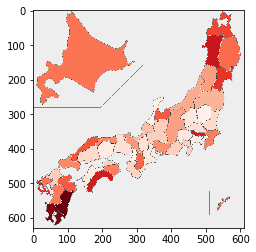

In [38]:
from japanmap import picture
from japanmap import get_data, pref_points
EconomicSurvey5 = EconomicSurvey4.set_index('H28_地域')
EconomicSurvey5=EconomicSurvey5[["Regional_index"]]

cmap = plt.get_cmap('Reds')
norm = plt.Normalize(vmin=EconomicSurvey5.Regional_index.min(), vmax=EconomicSurvey5.Regional_index.max())
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.imshow(picture(EconomicSurvey5.Regional_index.apply(fcol)));



## 解説


- GISソフトウェアでできるはずですが、なかなかしきいが高いで巣ので、都道府県別の結果を日本地図上に表示するライブラリーを使って簡単に可視化する方法を紹介します。
- 先ず、Andaconda Terminal を使い、「pip install japanmap==0.0.22」をコピーペーストする必要があります。その後、Jupyterを使って、JapanMapをインポートすることができます。https://libraries.io/pypi/japanmap・https://qiita.com/SaitoTsutomu/items/6d17889ba47357e44131

- プロットに簡単に使用できる形式でデータを取得します。set_indexを使用して、都道府県を行名にします.
    - set_index()メソッドを使うとpandas.DataFrameの既存の列をインデックスindex（行名、行ラベル）に割り当てることができる。
    https://note.nkmk.me/python-pandas-time-series-datetimeindex/

- cmapでカラーマップを作成します。 
- カラーマップと値を対応させるために、normで指標の値を正規化します。 
- fcolは、指標の値を色に変換する関数です。 pictureに、EconomicSurvey5.Regional_index.apply(fcol)を与えることで、指標ごとの色に塗ることができます。